In [20]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/Part01/'

In [21]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
print(app_train[:10])

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2     

In [23]:
sub_train = pd.DataFrame(app_train['CODE_GENDER'])
print(sub_train.shape)
sub_train.head()

(307511, 1)


,CODE_GENDER
0,M
1,F
2,M
3,F
4,M


In [24]:
df2 = pd.get_dummies(sub_train['CODE_GENDER'])#扁平化

In [25]:
print(df2.shape)

(307511, 3)


In [26]:
list(app_train.columns.values)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [28]:
sub_train2 = pd.DataFrame(app_train[['NAME_INCOME_TYPE','AMT_ANNUITY']])#取出年收和職業映射出一個子集
print(sub_train2.shape)
sub_train2.head()

(307511, 2)


,NAME_INCOME_TYPE,AMT_ANNUITY
0,Working,24700.5
1,State servant,35698.5
2,Working,6750.0
3,Working,29686.5
4,Working,21865.5


In [29]:
df3 = pd.get_dummies(sub_train2['NAME_INCOME_TYPE'])#職業扁平化

In [31]:
df3.head()#觀察

,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


In [41]:
df3.shape

(307511, 8)

In [52]:
list(df3.columns.values)

['Businessman',
 'Commercial associate',
 'Maternity leave',
 'Pensioner',
 'State servant',
 'Student',
 'Unemployed',
 'Working']

In [32]:
sub_train3 = pd.DataFrame(app_train[['AMT_ANNUITY']])#取出年收

In [46]:
sub_train4 = sub_train3.join(df3)#職業與年收合併
sub_train4.head()

,AMT_ANNUITY,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
0,24700.5,0,0,0,0,0,0,0,1
1,35698.5,0,0,0,0,1,0,0,0
2,6750.0,0,0,0,0,0,0,0,1
3,29686.5,0,0,0,0,0,0,0,1
4,21865.5,0,0,0,0,0,0,0,1


In [48]:
sub_train4['Commercial associate'].sum()#從事零售業的總人數

71617

In [51]:
sub_train4['Pensioner'].sum()#領退休金的總人數

55362

In [39]:
sub_train4['AMT_ANNUITY'].mean()#年收平均數

23740.2

In [40]:
sub_train4['AMT_ANNUITY'].std()#年收標準差

10856.599315623655

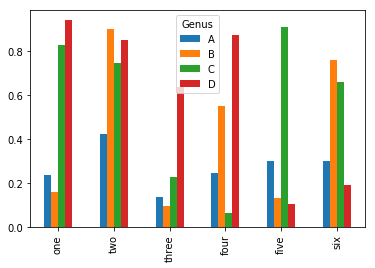

In [6]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name="Genus"))
df.plot(kind='bar')    # 如下图2(DF)

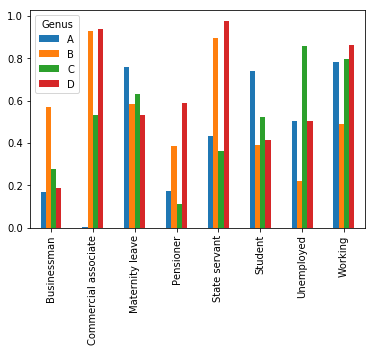

In [53]:
df = pd.DataFrame(np.random.rand(8, 4), index = list(df3.columns.values), columns=pd.Index(['A', 'B', 'C', 'D'], name="Genus"))
df.plot(kind='bar')    # 如下图2(DF)

In [54]:
sub_train4

,AMT_ANNUITY,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
0,24700.5,0,0,0,0,0,0,0,1
1,35698.5,0,0,0,0,1,0,0,0
2,6750.0,0,0,0,0,0,0,0,1
3,29686.5,0,0,0,0,0,0,0,1
4,21865.5,0,0,0,0,0,0,0,1
5,27517.5,0,0,0,0,1,0,0,0
6,41301.0,0,1,0,0,0,0,0,0
7,42075.0,0,0,0,0,1,0,0,0
8,33826.5,0,0,0,1,0,0,0,0
9,20250.0,0,0,0,0,0,0,0,1


In [82]:
sub_train_group_0 = pd.DataFrame(app_train[['NAME_INCOME_TYPE','AMT_ANNUITY']])

In [89]:
sub_train_group_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 2 columns):
NAME_INCOME_TYPE    307511 non-null object
AMT_ANNUITY         307499 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.7+ MB


In [92]:
sub_train_group_1 = sub_train_group_0[np.isfinite(sub_train_group_0['AMT_ANNUITY'])]

In [93]:
sub_train_group_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 2 columns):
NAME_INCOME_TYPE    307499 non-null object
AMT_ANNUITY         307499 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.0+ MB


In [63]:
sub_train_group = sub_train2.groupby("NAME_INCOME_TYPE")#使用職業分組 觀察各職業從業人數
sub_train_group.size()

NAME_INCOME_TYPE
Businessman                 10
Commercial associate     71617
Maternity leave              5
Pensioner                55362
State servant            21703
Student                     18
Unemployed                  22
Working                 158774
dtype: int64

In [64]:
sub_train_group.get_group("Student")

,NAME_INCOME_TYPE,AMT_ANNUITY
10277,Student,22311.0
16818,Student,24511.5
42679,Student,16164.0
48819,Student,10332.0
49917,Student,39712.5
58096,Student,19777.5
61121,Student,60691.5
69971,Student,25146.0
89506,Student,30690.0
104864,Student,30838.5


In [66]:
sub_train_group.get_group("Student").sum()

NAME_INCOME_TYPE    StudentStudentStudentStudentStudentStudentStud...
AMT_ANNUITY                                                    453384
dtype: object

In [72]:
sub_train_group.get_group("Student").mean()['AMT_ANNUITY']

25188.0

In [81]:
#sub_train_group.get_group("Businessman").mean()['AMT_ANNUITY']

sub_train_group.get_group("Commercial associate").mean()['AMT_ANNUITY']
#sub_train_group.get_group("Businessman").mean()['AMT_ANNUITY']
#sub_train_group.get_group("Businessman").mean()['AMT_ANNUITY']
#sub_train_group.get_group("Businessman").mean()['AMT_ANNUITY']
#sub_train_group.get_group("Businessman").mean()['AMT_ANNUITY']
#sub_train_group.get_group("Businessman").mean()['AMT_ANNUITY']


AttributeError: 'DataFrameGroupBy' object has no attribute 'isfinite'

In [68]:
for career in list(df3.columns.values):
    print(career)

Businessman
Commercial associate
Maternity leave
Pensioner
State servant
Student
Unemployed
Working


In [107]:
sub_train_group2 = []

for career in list(df3.columns.values):
    sub_train_group2.append(sub_train_group_groupby.get_group(career).mean()['AMT_ANNUITY'])

In [108]:
sub_train_group_np = np.asarray(sub_train_group2)


In [99]:
sub_train_group_groupby.get_group("Commercial associate").mean()

AMT_ANNUITY    30415.221067
dtype: float64

In [103]:
sub_train_group

In [109]:
sub_train_group_np

array([72675.        , 30415.22106711, 36986.4       , 23900.40029262,
       28864.49039171, 25188.        , 28178.38636364, 26492.65175602])

In [113]:
df6 = pd.DataFrame(sub_train_group_np, list(df3.columns.values), columns=pd.Index(['AMT_ANNUITY']))
#df6.plot(kind='bar')    # 如下图2(DF)

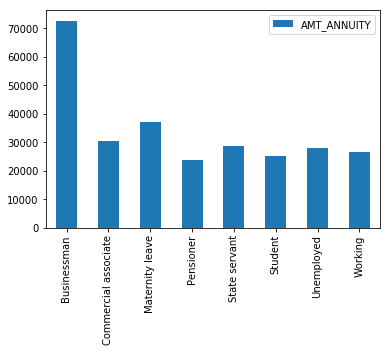

In [114]:
df6.plot(kind='bar')